In [6]:
import pandas as pd
import numpy as np
import polars as pl
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

from datetime import datetime, timedelta

## Question 1: Load (50 Points)


- Programmatically download and load into your favorite analytical tool the transactions data. This data, which is in line-delimited JSON format, can be found as transactions.txt (above attached)

In [7]:
transactions = pd.read_json('transactions.txt',lines=True)
transactions.head()

accountNumber  customerId  creditLimit  availableMoney   
0      737265056   737265056         5000          5000.0  \
1      737265056   737265056         5000          5000.0   
2      737265056   737265056         5000          5000.0   
3      737265056   737265056         5000          5000.0   
4      830329091   830329091         5000          5000.0   

   transactionDateTime  transactionAmount         merchantName acqCountry   
0  2016-08-13T14:27:32              98.55                 Uber         US  \
1  2016-10-11T05:05:54              74.51          AMC #191138         US   
2  2016-11-08T09:18:39               7.47           Play Store         US   
3  2016-12-10T02:14:50               7.47           Play Store         US   
4  2016-03-24T21:04:46              71.18  Tim Hortons #947751         US   

  merchantCountryCode posEntryMode  ... echoBuffer currentBalance   
0                  US           02  ...                       0.0  \
1                  US           09  ...                       0.0   
2                  US           09  ...                       0.0   
3                  US           09  ...                       0.0   
4                  US           02  ...                       0.0   

  merchantCity merchantState merchantZip  cardPresent  posOnPremises   
0                                               False                 \
1                                                True                  
2                                               False                  
3                                               False                  
4                                                True                  

   recurringAuthInd expirationDateKeyInMatch isFraud  
0                                      False   False  
1                                      False   False  
2                                      False   False  
3                                      False   False  
4                                      False   False  

[5 rows x 29 columns]

In [8]:
transactions.head()

accountNumber  customerId  creditLimit  availableMoney   
0      737265056   737265056         5000          5000.0  \
1      737265056   737265056         5000          5000.0   
2      737265056   737265056         5000          5000.0   
3      737265056   737265056         5000          5000.0   
4      830329091   830329091         5000          5000.0   

   transactionDateTime  transactionAmount         merchantName acqCountry   
0  2016-08-13T14:27:32              98.55                 Uber         US  \
1  2016-10-11T05:05:54              74.51          AMC #191138         US   
2  2016-11-08T09:18:39               7.47           Play Store         US   
3  2016-12-10T02:14:50               7.47           Play Store         US   
4  2016-03-24T21:04:46              71.18  Tim Hortons #947751         US   

  merchantCountryCode posEntryMode  ... echoBuffer currentBalance   
0                  US           02  ...                       0.0  \
1                  US           09  ...                       0.0   
2                  US           09  ...                       0.0   
3                  US           09  ...                       0.0   
4                  US           02  ...                       0.0   

  merchantCity merchantState merchantZip  cardPresent  posOnPremises   
0                                               False                 \
1                                                True                  
2                                               False                  
3                                               False                  
4                                                True                  

   recurringAuthInd expirationDateKeyInMatch isFraud  
0                                      False   False  
1                                      False   False  
2                                      False   False  
3                                      False   False  
4                                      False   False  

[5 rows x 29 columns]

- Please describe the structure of the data. Number of records and fields in each record?

In [9]:
transactions.shape

(786363, 29)

In [10]:
print("Number of records in the data is " + str(transactions.shape[0]))
print("Number of fields in the data is " + str(transactions.shape[1]))

Number of records in the data is 786363
Number of fields in the data is 29


In [11]:
df = transactions.copy()
df = df.replace('', None)

In [12]:
df.isna().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

In [13]:
df = df.drop(['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  object 
 10  posConditionCode          785954 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [14]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 776668 entries, 0 to 786362
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             776668 non-null  int64  
 1   customerId                776668 non-null  int64  
 2   creditLimit               776668 non-null  int64  
 3   availableMoney            776668 non-null  float64
 4   transactionDateTime       776668 non-null  object 
 5   transactionAmount         776668 non-null  float64
 6   merchantName              776668 non-null  object 
 7   acqCountry                776668 non-null  object 
 8   merchantCountryCode       776668 non-null  object 
 9   posEntryMode              776668 non-null  object 
 10  posConditionCode          776668 non-null  object 
 11  merchantCategoryCode      776668 non-null  object 
 12  currentExpDate            776668 non-null  object 
 13  accountOpenDate           776668 non-null  object

In [15]:
df.isna().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64

- Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.

In [16]:
df.describe()

accountNumber    customerId    creditLimit  availableMoney   
count   7.766680e+05  7.766680e+05  776668.000000   776668.000000  \
mean    5.372356e+08  5.372356e+08   10756.182822     6247.583238   
std     2.553894e+08  2.553894e+08   11631.241047     8873.694052   
min     1.000881e+08  1.000881e+08     250.000000    -1005.630000   
25%     3.301333e+08  3.301333e+08    5000.000000     1077.520000   
50%     5.074561e+08  5.074561e+08    7500.000000     3184.285000   
75%     7.676200e+08  7.676200e+08   15000.000000     7500.000000   
max     9.993896e+08  9.993896e+08   50000.000000    50000.000000   

       transactionAmount        cardCVV     enteredCVV  cardLast4Digits   
count      776668.000000  776668.000000  776668.000000    776668.000000  \
mean          136.975808     544.517081     544.229697      4757.115114   
std           147.697222     261.531955     261.561830      2996.727839   
min             0.000000     100.000000       0.000000         0.000000   
25%            33.650000     310.000000     310.000000      2178.000000   
50%            87.890000     535.000000     535.000000      4733.000000   
75%           191.500000     785.000000     785.000000      7338.000000   
max          2011.540000     998.000000     998.000000      9998.000000   

       currentBalance  
count   776668.000000  
mean      4508.599584  
std       6457.248679  
min          0.000000  
25%        689.985000  
50%       2451.715000  
75%       5289.120000  
max      47498.810000

### Find unique values across appropriate columns

In [17]:
df.nunique()

accountNumber                 4997
customerId                    4997
creditLimit                     10
availableMoney              517320
transactionDateTime         767184
transactionAmount            65851
merchantName                  2489
acqCountry                       4
merchantCountryCode              4
posEntryMode                     5
posConditionCode                 3
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate               1818
dateOfLastAddressChange       2182
cardCVV                        899
enteredCVV                     976
cardLast4Digits               5241
transactionType                  3
currentBalance              483290
cardPresent                      2
expirationDateKeyInMatch         2
isFraud                          2
dtype: int64

In [18]:
pd.DataFrame(df['acqCountry'].value_counts()).reset_index().style.hide(axis='index')

In [19]:
pd.DataFrame(df['merchantCountryCode'].value_counts()).reset_index().style.hide(axis='index')

In [20]:
pd.DataFrame(df['posEntryMode'].value_counts()).reset_index().style.hide(axis='index')

In [21]:
pd.DataFrame(df['posConditionCode'].value_counts()).reset_index().style.hide(axis='index')

In [22]:
pd.DataFrame(df['merchantCategoryCode'].value_counts()).reset_index().style.hide(axis='index')

In [23]:
pd.DataFrame(df['transactionType'].value_counts()).reset_index().style.hide(axis='index')

In [24]:
pd.DataFrame(df['cardPresent'].value_counts()).reset_index().style.hide(axis='index')

In [25]:
pd.DataFrame(df['expirationDateKeyInMatch'].value_counts()).reset_index().style.hide(axis='index')

## Question 2: Plot (25 Points)

- Plot a histogram of the processed amounts of each transaction, the transactionAmount column.

<Axes: xlabel='transactionAmount', ylabel='Count'>

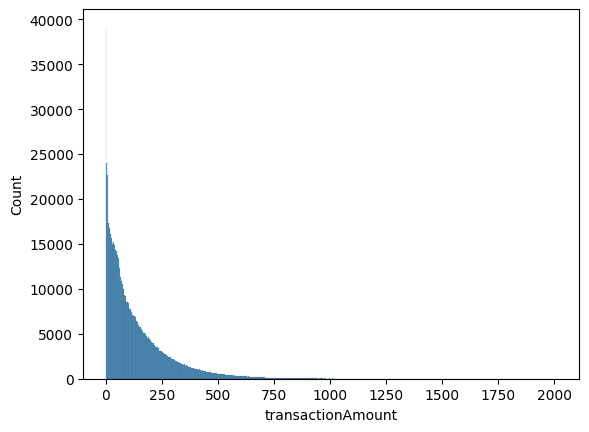

In [26]:
sns.histplot(data=transactions, x="transactionAmount")

- Report any structure you find and any hypotheses you have about that structure.


> The data appears to be positively skewed with a huge chunk of transactions occuring for 0 dollars. From seeing the unique values above, the Transaction Type there is one which is 'ADDRESS_VERIFICATION' which might mean that the card was swiped for checking the address and was charged no amount. The other type was 'REVERSAL' which could mean a check of 0 dollar transaction again. Other scenarios might be for cases where the card was swiped to check if it works (maybe someone had stolen it and swiped to check it's usage) or if the card was swiped for memberships where it was charged 0 dollars for the first month.



## Question 3: Data Wrangling - Duplicate Transactions (75 Points)
You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal. Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.

- Can you programmatically identify reversed and multi-swipe transactions?

In [27]:
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])
df = df.sort_values(by=['accountNumber', 'transactionDateTime']).reset_index(drop=True)
df['date'] = df['transactionDateTime'].dt.date
df

accountNumber  customerId  creditLimit  availableMoney   
0           100088067   100088067        50000        50000.00  \
1           100088067   100088067        50000        49794.87   
2           100088067   100088067        50000        49748.44   
3           100088067   100088067        50000        50000.00   
4           100088067   100088067        50000        49933.93   
...               ...         ...          ...             ...   
776663      999389635   999389635         5000         4921.32   
776664      999389635   999389635         5000         4653.70   
776665      999389635   999389635         5000         4674.08   
776666      999389635   999389635         5000         4694.46   
776667      999389635   999389635         5000         4714.84   

       transactionDateTime  transactionAmount                    merchantName   
0      2016-01-12 00:59:52             205.13            EZ Putt Putt #982199  \
1      2016-01-12 19:49:41              46.43  Dinosaur Sandwitch Bar #303701   
2      2016-01-17 15:41:46             378.67                   Mobile eCards   
3      2016-02-02 19:57:18              66.07             EZ Putt Putt #40513   
4      2016-02-03 04:48:54             141.60                34th BBQ #412895   
...                    ...                ...                             ...   
776663 2016-09-16 15:35:24             267.62              Franks Pub #680641   
776664 2016-09-22 13:58:30               4.62                      Play Store   
776665 2016-10-23 16:47:41               4.62                      Play Store   
776666 2016-11-24 00:21:46               4.62                      Play Store   
776667 2016-12-24 05:19:30               4.62                      Play Store   

       acqCountry merchantCountryCode posEntryMode  ...   
0              US                  US           02  ...  \
1              US                  US           05  ...   
2              US                  US           05  ...   
3              US                  US           02  ...   
4              US                  US           09  ...   
...           ...                 ...          ...  ...   
776663         US                  US           09  ...   
776664         US                  US           05  ...   
776665         US                  US           05  ...   
776666         US                  US           05  ...   
776667         US                  US           05  ...   

       dateOfLastAddressChange cardCVV enteredCVV cardLast4Digits   
0                   2014-01-09     546        546            4615  \
1                   2014-01-09     546        546            4615   
2                   2014-01-09     402        402            2077   
3                   2014-01-09     546        546            4615   
4                   2014-01-09     546        546            4615   
...                        ...     ...        ...             ...   
776663              2015-10-09     140        140            3991   
776664              2015-10-09     140        140            3991   
776665              2015-10-09     140        140            3991   
776666              2015-10-09     140        140            3991   
776667              2015-10-09     140        140            3991   

       transactionType  currentBalance  cardPresent  expirationDateKeyInMatch   
0             PURCHASE            0.00         True                     False  \
1             PURCHASE          205.13         True                     False   
2             PURCHASE          251.56        False                     False   
3             PURCHASE            0.00         True                     False   
4             PURCHASE           66.07         True                     False   
...                ...             ...          ...                       ...   
776663        PURCHASE           78.68         True                     False   
776664        PURCHASE          346.30        False     

In [28]:
df['isReversed'] = 'NOT REVERSED'
for i in df.index:
    # identify reversal
    if i < len(df):
        if df['transactionType'].iloc[i] == 'REVERSAL':
            currAccNo = df['accountNumber'].iloc[i]
            currAmount = df['transactionAmount'].iloc[i]
            currMerchant = df['merchantName'].iloc[i]
            currDate = df['date'].iloc[i]

            prevAccNo = df['accountNumber'].iloc[i-1]
            prevAmount = df['transactionAmount'].iloc[i-1]
            prevMerchant = df['merchantName'].iloc[i-1]
            prevDate = df['date'].iloc[i-1]
            
            if df['transactionType'].iloc[i-1] == 'PURCHASE':
                if ((currAccNo == prevAccNo) & (currAmount == prevAmount) & (currMerchant == prevMerchant) & ((currDate == prevDate))):
                    df['isReversed'].iloc[i] = 'REVERSAL TRANSACTION'

pd.DataFrame(df['isReversed'].value_counts()).reset_index().style.hide(axis='index')

C:\Users\yomaa\AppData\Local\Temp\ipykernel_5936\4050445492.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isReversed'].iloc[i] = 'REVERSAL TRANSACTION'
C:\Users\yomaa\AppData\Local\Temp\ipykernel_5936\4050445492.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isReversed'].iloc[i] = 'REVERSAL TRANSACTION'
C:\Users\yomaa\AppData\Local\Temp\ipykernel_5936\4050445492.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [29]:
df[df['isReversed'] == 'REVERSAL TRANSACTION']

accountNumber  customerId  creditLimit  availableMoney   
64          100088067   100088067        50000        49811.88  \
96          100328049   100328049         5000         4605.10   
858         101596991   101596991         5000         2107.83   
1296        101876201   101876201          250          131.85   
1338        101876201   101876201          250          207.46   
...               ...         ...          ...             ...   
776127      999086814   999086814        10000         4199.02   
776181      999086814   999086814        10000         4092.38   
776378      999257059   999257059        15000        14322.20   
776446      999258704   999258704         5000         4246.82   
776489      999258704   999258704         5000         4865.17   

       transactionDateTime  transactionAmount          merchantName   
64     2016-11-20 08:00:04              22.32            AMC #79863  \
96     2016-01-15 20:36:18              43.74                  Lyft   
858    2016-12-30 19:50:06             294.01  Franks Sandwitch Bar   
1296   2016-04-14 06:08:33             118.15           alibaba.com   
1338   2016-06-16 15:39:11              49.07         cheapfast.com   
...                    ...                ...                   ...   
776127 2016-10-14 21:40:47              51.58                  Lyft   
776181 2016-11-14 11:31:16             153.89                  Uber   
776378 2016-08-09 11:25:46             557.11      Washington Times   
776446 2016-03-16 07:14:17             367.13                  Uber   
776489 2016-09-02 03:33:07              72.93               gap.com   

       acqCountry merchantCountryCode posEntryMode  ... cardCVV enteredCVV   
64             US                  US           09  ...     546        546  \
96             US                  US           09  ...     206        206   
858            US                  US           05  ...     395        395   
1296           US                  US           05  ...     371        371   
1338           US                  US           02  ...     371        371   
...           ...                 ...          ...  ...     ...        ...   
776127         US                  US           09  ...     715        715   
776181         US                  US           02  ...     715        715   
776378         US                  US           05  ...     959        959   
776446         US                  US           09  ...     708        708   
776489         US                  US           09  ...     708        708   

       cardLast4Digits transactionType currentBalance  cardPresent   
64                4615        REVERSAL         188.12         True  \
96                2941        REVERSAL         394.90        False   
858                171        REVERSAL        2892.17         True   
1296              4725        REVERSAL         118.15        False   
1338              4725        REVERSAL          42.54        False   
...                ...             ...            ...          ...   
776127             252        REVERSAL        5800.98        False   
776181             252        REVERSAL        5907.62        False   
776378            8291        REVERSAL         677.80        False   
776446            3757        REVERSAL         753.18        False   
776489            3757        REVERSAL         134.83        False   

        expirationDateKeyInMatch  isFraud        date            isReversed  
64                         False    False  2016-11-20  REVERSAL TRANSACTION  
96                         False    False  2016-01-15  REVERSAL TRANSACTION  
858                        False    False  2016-12-30  REVERSAL TRANSACTION  
1296                       False    False  2016-04-14  REVERSAL TRANSACTION  
1338                       False    False  2016-06-16  REVERSAL TRANSACTION  
...                          ...      ...         ...                   ...  
776127                     False    Fa

In [30]:
df['isMulti'] = 'NOT MULTI-SWIPE'
for i in df.index:
    # identify reversal
    if i < len(df):
        if df['transactionType'].iloc[i] != 'REVERSAL':
            currAccNo = df['accountNumber'].iloc[i]
            currAmount = df['transactionAmount'].iloc[i]
            currMerchant = df['merchantName'].iloc[i]
            currTime = df['transactionDateTime'].iloc[i]
            
            prevAccNo = df['accountNumber'].iloc[i-1]
            prevAmount = df['transactionAmount'].iloc[i-1]
            prevMerchant = df['merchantName'].iloc[i-1]
            prevTime = df['transactionDateTime'].iloc[i-1]

        if df['transactionType'].iloc[i-1] == 'PURCHASE':
            if ((currAccNo == prevAccNo) & (currAmount == prevAmount) & (currMerchant == prevMerchant) & (currTime - prevTime < timedelta(seconds=120))):
                df['isMulti'].iloc[i] = 'MULTI-SWIPE'

pd.DataFrame(df['isMulti'].value_counts()).reset_index().style.hide(axis='index')

C:\Users\yomaa\AppData\Local\Temp\ipykernel_5936\3941857261.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isMulti'].iloc[i] = 'MULTI-SWIPE'
C:\Users\yomaa\AppData\Local\Temp\ipykernel_5936\3941857261.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isMulti'].iloc[i] = 'MULTI-SWIPE'
C:\Users\yomaa\AppData\Local\Temp\ipykernel_5936\3941857261.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isMulti'].iloc[i] = 

In [31]:
df[df['isMulti'] == 'MULTI-SWIPE']

accountNumber  customerId  creditLimit  availableMoney   
56          100088067   100088067        50000        49275.09  \
231         100737756   100737756          250          -44.75   
317         100737756   100737756          250          250.00   
322         100737756   100737756          250          177.98   
447         101132326   101132326         1000          794.71   
...               ...         ...          ...             ...   
775844      999086814   999086814        10000          933.15   
775995      999086814   999086814        10000         5418.98   
776212      999086814   999086814        10000         6153.67   
776252      999086814   999086814        10000          503.05   
776563      999283629   999283629         2500         1368.90   

       transactionDateTime  transactionAmount             merchantName   
56     2016-10-16 18:01:02             411.35            Fresh Flowers  \
231    2016-01-18 01:55:28             693.50              Franks Deli   
317    2016-07-02 12:07:00             211.22  South Steakhouse #73819   
322    2016-07-10 14:32:06              43.25         34th BBQ #166379   
447    2016-08-24 02:09:44             188.86     Regal Cinemas #05791   
...                    ...                ...                      ...   
775844 2016-05-07 17:56:48              49.44                     Lyft   
775995 2016-08-04 00:04:03             172.50              staples.com   
776212 2016-11-28 08:28:01             356.16                     Lyft   
776252 2016-12-19 02:49:22              22.76                apple.com   
776563 2016-04-09 12:56:52             247.40           Delta Airlines   

       acqCountry merchantCountryCode posEntryMode  ... enteredCVV   
56             US                  US           02  ...        402  \
231            US                  US           05  ...        463   
317            US                  US           09  ...        463   
322            US                  US           02  ...        463   
447            US                  US           05  ...        631   
...           ...                 ...          ...  ...        ...   
775844         US                  US           05  ...        715   
775995         US                  US           05  ...        126   
776212         US                  US           05  ...        715   
776252         US                  US           05  ...        126   
776563         US                  US           05  ...        919   

       cardLast4Digits transactionType currentBalance cardPresent   
56                2077        PURCHASE         724.91       False  \
231               4317        PURCHASE         294.75        True   
317               4317        PURCHASE           0.00        True   
322               4317        PURCHASE          72.02        True   
447               2239        PURCHASE         205.29        True   
...                ...             ...            ...         ...   
775844             252        PURCHASE        9066.85       False   
775995            6140        PURCHASE        4581.02       False   
776212             252        PURCHASE        3846.33       False   
776252            6140        PURCHASE        9496.95       False   
776563            4157        PURCHASE        1131.10       False   

        expirationDateKeyInMatch  isFraud        date    isReversed   
56                         False    False  2016-10-16  NOT REVERSED  \
231                        False    False  2016-01-18  NOT REVERSED   
317                        False    False  2016-07-02  NOT REVERSED   
322                        False    False  2016-07-10  NOT REVERSED   
447                        False    False  2016-08-24  NOT REVERSED   
...                          ...      ...         ...           ...   
775844                     False    False  2016-05-07  NOT REVERSED   
775995                     False    False  2016-08-04  NOT REVERSED   
776212           

- What total number of transactions and total dollar amount do you estimate for the reversed transactions? For the multi-swipe transactions? (please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts)

In [32]:
print("The number of transactions that are reversal = " + str(len(df[df['isReversed'] == 'REVERSAL TRANSACTION'])))
df_reversed = df[df['isReversed'] == 'REVERSAL TRANSACTION']
print("The transaction Amount for reversed amount = $" + str(df_reversed['transactionAmount'].sum()))

print("The number of transactions that are multi-swipe = " + str(len(df[df['isMulti'] == 'MULTI-SWIPE'])))
df_multi = df[df['isMulti'] == 'MULTI-SWIPE']
print("The transaction Amount for multi-swipe amount = $" + str(df_multi['transactionAmount'].sum()))

The number of transactions that are reversal = 5429
The transaction Amount for reversed amount = $813878.5800000001
The number of transactions that are multi-swipe = 4922
The transaction Amount for multi-swipe amount = $741798.7000000001


- Did you find anything interesting about either kind of transaction?

I believe these are issues on the merchant side as thse seem to occure for merchants only and not due to a fraudulent activity

## Question 4: Model (100 Points)
Fraud is a problem for any bank. Fraud can take many forms, whether it is someone stealing a single credit card, to large batches of stolen credit card numbers being used on the web, or even a mass compromise of credit card numbers stolen from a merchant via tools like credit card skimming devices.

- Each of the transactions in the dataset has a field called isFraud. Please build a machine learning model to determine whether a given transaction will be fraudulent or not. Use as much of the data as you like (or all of it).

In [33]:
df_1 = df.copy()

df_2 = pd.get_dummies(df_1.drop(['accountNumber','customerId','transactionDateTime','merchantName','dateOfLastAddressChange','accountOpenDate','currentExpDate'],axis=1),prefix_sep='_', dtype=float)
df_2['cardPresent'] = df_2['cardPresent'].astype(int)
df_2['expirationDateKeyInMatch'] = df_2['cardPresent'].astype(int)
df_2['isFraud'] = df_2['isFraud'].astype(int)
df_2

creditLimit  availableMoney  transactionAmount  cardCVV  enteredCVV   
0             50000        50000.00             205.13      546         546  \
1             50000        49794.87              46.43      546         546   
2             50000        49748.44             378.67      402         402   
3             50000        50000.00              66.07      546         546   
4             50000        49933.93             141.60      546         546   
...             ...             ...                ...      ...         ...   
776663         5000         4921.32             267.62      140         140   
776664         5000         4653.70               4.62      140         140   
776665         5000         4674.08               4.62      140         140   
776666         5000         4694.46               4.62      140         140   
776667         5000         4714.84               4.62      140         140   

        cardLast4Digits  currentBalance  cardPresent   
0                  4615            0.00            1  \
1                  4615          205.13            1   
2                  2077          251.56            0   
3                  4615            0.00            1   
4                  4615           66.07            1   
...                 ...             ...          ...   
776663             3991           78.68            1   
776664             3991          346.30            0   
776665             3991          325.92            0   
776666             3991          305.54            0   
776667             3991          285.16            0   

        expirationDateKeyInMatch  isFraud  ...  date_2016-12-25   
0                              1        0  ...              0.0  \
1                              1        0  ...              0.0   
2                              0        0  ...              0.0   
3                              1        0  ...              0.0   
4                              1        0  ...              0.0   
...                          ...      ...  ...              ...   
776663                         1        0  ...              0.0   
776664                         0        0  ...              0.0   
776665                         0        0  ...              0.0   
776666                         0        0  ...              0.0   
776667                         0        0  ...              0.0   

        date_2016-12-26  date_2016-12-27  date_2016-12-28  date_2016-12-29   
0                   0.0              0.0              0.0              0.0  \
1                   0.0              0.0              0.0              0.0   
2                   0.0              0.0              0.0              0.0   
3                   0.0              0.0              0.0              0.0   
4                   0.0              0.0              0.0              0.0   
...                 ...              ...              ...              ...   
776663              0.0              0.0              0.0              0.0   
776664              0.0              0.0              0.0              0.0   
776665              0.0              0.0              0.0              0.0   
776666              0.0              0.0              0.0              0.0   
776667              0.0              0.0              0.0              0.0   

        date_2016-12-30  isReversed_NOT REVERSED   
0                   0.0                      1.0  \
1                   0.0                      1.0   
2                   0.0                      1.0   
3                   0.0                      1.0   
4                   0.0                      1.0   
...                 ...                      ...   
776663              0.0                      1.0   
776664              0.0                      1.0   
776665              0.0                      1.0   
776666              0.0                      1.0   
776667              0.0                      1.0   

        isReversed_

In [34]:
X = df_2.drop(['isFraud'],axis=1)
y = df_2['isFraud']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8, random_state=42)

In [35]:
# create a Logistic Regression model
lr_model = LogisticRegression()

# fit the model on the training set
lr_model.fit(X_train, y_train)

# make predictions on the test set
y_pred = lr_model.predict(X_test)

- Provide an estimate of performance using an appropriate sample, and show your work.

In [36]:
# get the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9846524263844361


- Please explain your methodology (modeling algorithm/method used and why, what features/data you found useful, what questions you have, and what you would do next with more time)


> - I dropped these ['accountNumber','customerId','transactionDateTime','merchantName','dateOfLastAddressChange','accountOpenDate','currentExpDate'] columns as I believe they are not required for the predition of fraud and it is more dependant on the other factors.
> - I used logistic regression as it's quick and easy to use and I was out of time.
> - If I had more time I would do feature engineering and run more models.



In [38]:

# using datetime module
import datetime;
 
# ct stores current time
ct = datetime.datetime.now()
print("current time:-", ct)
 
# ts store timestamp of current time
ts = ct.timestamp()
print("timestamp:-", ts)

current time:- 2023-04-29 22:17:57.701493
timestamp:- 1682824677.701493
